In [1]:
%matplotlib inline


# Model eigenvalues  

Eigenvalues are a fundamental concept in dynamic models. In simple terms, they summarize the adjustment process within a model. In the context of dynamic models, the sign and magnitude of the eigenvalues determine whether a system of equations will converge to a stable equilibrium, oscillate, or diverge. 

In the case of a macromodel, which is effectively a system of differential equations, the eigenvalues of the coefficient matrix determine whether the system is stable, marginally stable, or unstable. If all the eigenvalues have negative real parts, then the system is stable and will converge to a steady state over time. If at least one eigenvalue has a positive real part, then the system is unstable, and the solutions will diverge over time.


The modelflow library includes a range of methods to calculate the eigenvalues of a model, which can be used to help to assure that a model's dynamics will be stable and to identify sources of instability where they exist.

## Initialization of modelflow environment



In [2]:
#This is code to manage dependencies if the notebook is executed in the google colab cloud service
if 'google.colab' in str(get_ipython()):
  import os
  os.system('apt -qqq install graphviz')
  os.system('pip -qqq install ModelFlowIb ipysheet  --no-dependencies ')
  incolab = True  
else:
  incolab = False 

In [3]:
from modelclass import model 
from modelnewton import newton_diff
import modelmf
model.widescreen()
model.scroll_off()

In [4]:
%load_ext autoreload
%autoreload 2

## Load a pre-existing model, data and descriptions 

For the purposes of this exposition the climate aware model forPakistan described {cite:author}`burns_climate_2021` is used.



In [5]:
mpak,baseline = model.modelload('../models/pak.pcim',alfa=0.7,run=0,ljit=0)
with mpak.timer('solve') as t: 
    baseline = mpak(baseline,2023,2100,alfa=0.7,ljit=0,solver='sim',silent=1,nonlin=14,forcenum=False,timeit=0)

file read:  C:\modelflow manual\papers\mfbook\content\models\pak.pcim
solve took       :         0.8443284035 Seconds


## the method .newton_diff()

The model flow method `.newtondiff()` calculates the derivatives of the mpak model. The `ljit=True` instructs modelflow to compile the model first. Compiling the model takes time, but subsequent model solutions much more efficient. When a model is going to be solved multiple times, the time taken to compile the model will be compensated for by faster solutions of the model.

The object mpak_newton is an object of typenewton_diff assigned the derivatives from the model.


In [6]:
mpak_newton = newton_diff(mpak,forcenum=0,ljit=False)      # create a newton_diff instance which contains derivatives 

In [7]:
#help(mpak_newton)

The get_eigenvectors function calculates the actual eigenvectors of the model.  For a large model this can be a fairly time consuming calcylation taking several minutes  even on relatively powerful multicore i9 computers.

Once the eigenvalues are calculated they can be displayed graphically with the `.eigplot_all()` method.

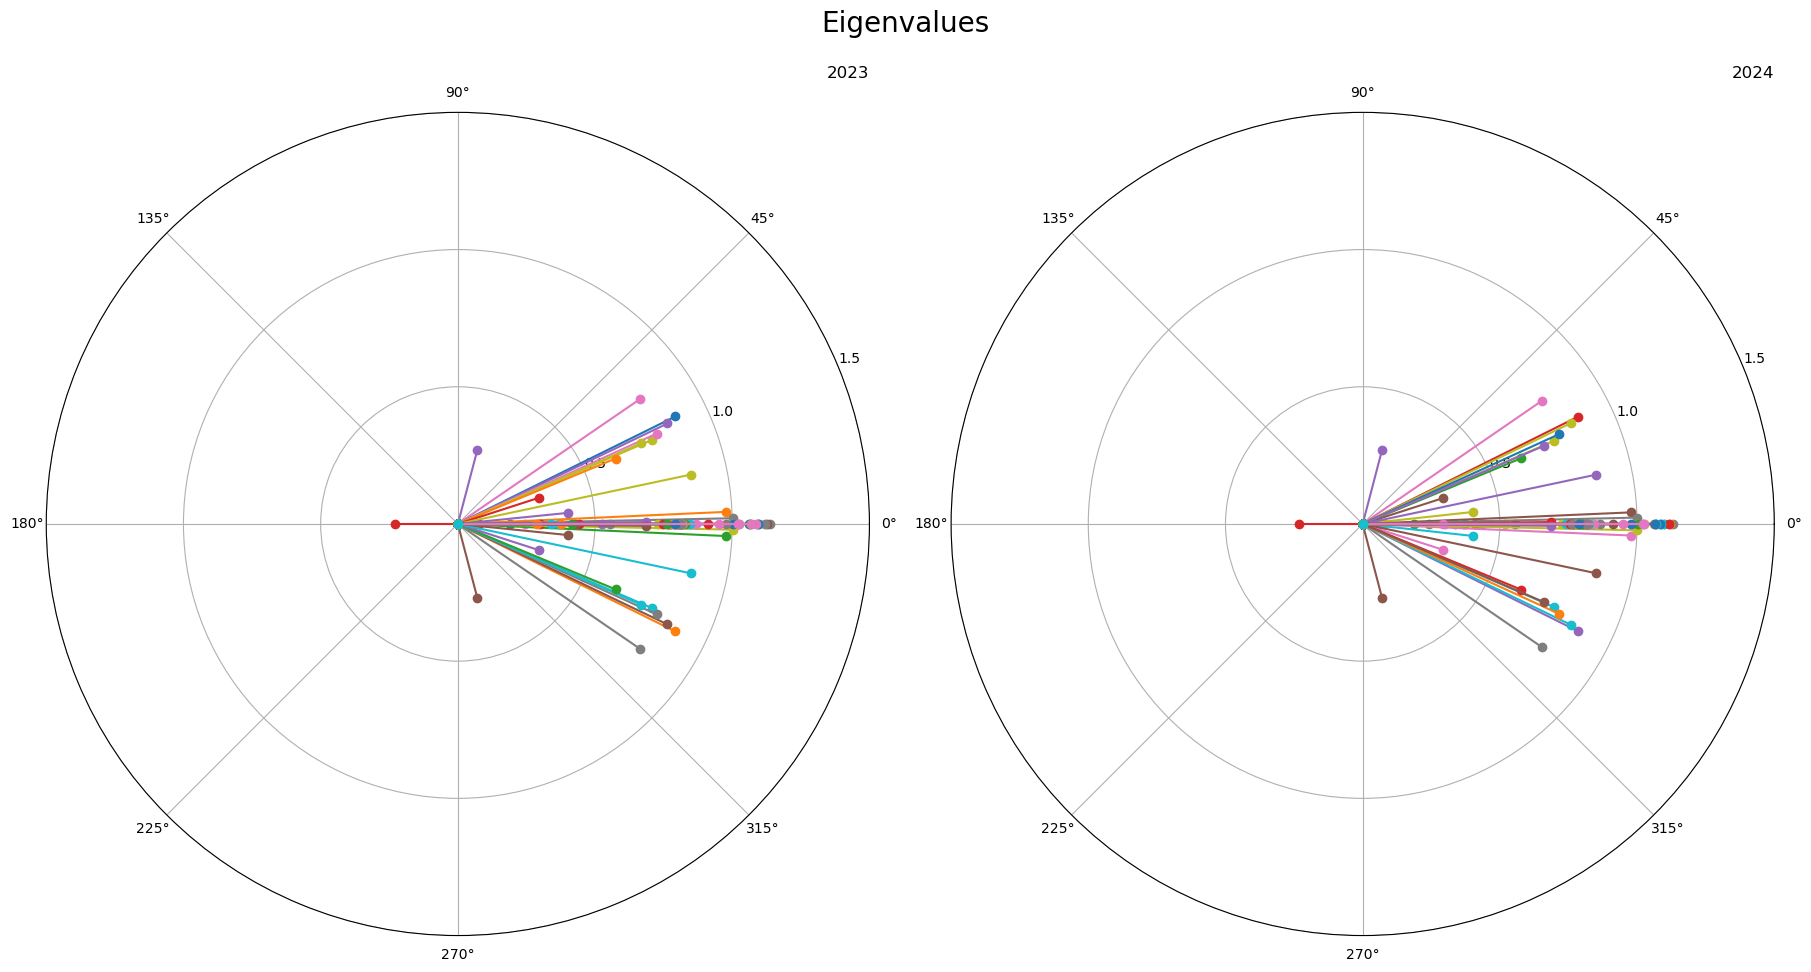

In [8]:
eig_dic = mpak_newton.get_eigenvectors(filnan = True,periode= (2023,2024),silent=False,asdf=1) #  
mpak_newton.eigplot_all(eig_dic,size=(3,3));


In [9]:
eigen = eig_dic[2023]
gt1_no_imag = [(ii,i)  for ii,i in enumerate(eigen) if abs(i) >= 1 and abs(i.imag) < 0.0000000001]
gt1_imag    = [(ii,i)  for ii,i in enumerate(eigen) if abs(i) >= 1 and abs(i.imag) >  0.00000001]

print(*[f'element {ii} length: {abs(i):.5f} {i.real:.5f} {i.imag:.5f}' for ii,i in gt1_no_imag],sep='\n')
print(*[f'element {ii} length: {abs(i):.5f} {i.real:.5f} {i.imag:.5f}' for ii,i in gt1_imag],sep='\n')

[f'element {ii} length: {abs(i):.10f} {i.real:.5f} {i.imag:.5f}'  for ii,i in enumerate(eigen) if 0.0000000001 < abs(i) <0.4 ]

element 1478 length: 1.09868 1.09868 0.00000
element 1479 length: 1.09513 1.09513 0.00000
element 1487 length: 1.13663 1.13663 0.00000
element 1488 length: 1.02299 1.02299 0.00000
element 1497 length: 1.00816 1.00816 0.00000
element 1645 length: 1.12521 1.12521 0.00000
element 1647 length: 1.12010 1.12010 0.00000
element 1650 length: 1.09349 1.09349 0.00000
element 1656 length: 1.08554 1.08554 0.00000
element 1660 length: 1.06036 1.06036 0.00000
element 1661 length: 1.06998 1.06998 0.00000
element 1662 length: 1.06368 1.06368 0.00000
element 1666 length: 1.06952 1.06952 0.00000
element 1668 length: 1.00000 1.00000 0.00000
element 1670 length: 1.00287 1.00287 0.00000
element 1866 length: 1.02000 1.02000 0.00000
element 1886 length: 1.02441 1.02441 0.00000
element 1657 length: 1.00303 1.00282 0.02084
element 1658 length: 1.00303 1.00282 -0.02084


['element 1623 length: 0.2307678896 -0.23077 0.00000',
 'element 1624 length: 0.2788699243 0.07108 0.26966',
 'element 1625 length: 0.2788699243 0.07108 -0.26966',
 'element 1632 length: 0.0594276016 0.05943 0.00000',
 'element 1633 length: 0.0785485990 0.07855 0.00000',
 'element 1640 length: 0.1884544057 0.18845 0.00000',
 'element 1643 length: 0.3117422233 0.29665 0.09583',
 'element 1644 length: 0.3117422233 0.29665 -0.09583',
 'element 1646 length: 0.2443305424 0.24433 0.00000',
 'element 1653 length: 0.3000000000 0.30000 0.00000',
 'element 1659 length: 0.3399477309 0.33995 0.00000',
 'element 1669 length: 0.3686458569 0.36865 0.00000',
 'element 1671 length: 0.3768435271 0.37684 0.00000',
 'element 1681 length: 0.2899588642 0.28996 0.00000',
 'element 1698 length: 0.0000000043 0.00000 0.00000',
 'element 1699 length: 0.0000000043 -0.00000 0.00000']

In [10]:
mpak_newton.eigen_values_and_vectors[2023][0][1657]

(1.0028172096692773+0.02084444210745352j)

In [22]:
xx = mpak_newton.eigen_values_and_vectors[2023][1][1657]
yy = [(ii,i.real,i.imag)  for ii,i in enumerate(xx) if abs(i) > 0.000000001]
print(*yy,sep='\n')


(1626, -5.0543097810345076e-09, 7.086058202626738e-09)
(1627, -5.0543097810345076e-09, -7.086058202626738e-09)
(1645, -5.537199841591246e-09, 0.0)
(1647, -3.8059306663069655e-09, 0.0)
(1648, -3.587473136143681e-09, -1.1678897602362289e-09)
(1649, -3.587473136143681e-09, 1.1678897602362289e-09)
(1650, -3.4514811869935706e-09, 0.0)
(1651, 1.6785922599894324e-09, 2.8886942623188987e-10)
(1652, 1.6785922599894324e-09, -2.8886942623188987e-10)
(1657, 1.3564064191304258e-09, 2.215037032418243e-09)
(1658, 1.3564064191304258e-09, -2.215037032418243e-09)
(1661, -3.924031748151964e-09, 0.0)
(1662, 4.84538201291649e-09, 0.0)
(1666, -4.71020176675699e-09, 0.0)
(1670, 2.7299171110779588e-09, 0.0)
(1886, 5.336085691629689e-09, 0.0)


In [12]:
1478/300

4.926666666666667